<a href="https://colab.research.google.com/github/hwangsaeyeon/LG-Aimers/blob/main/eclf_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [169]:
import pandas as pd
import numpy as np

train = pd.read_csv("/content/drive/MyDrive/aimers/train.csv",)
test = pd.read_csv("/content/drive/MyDrive/aimers/test.csv",)
submission = pd.read_csv("/content/drive/MyDrive/aimers/sample_submission.csv",)
spec = pd.read_csv("/content/drive/MyDrive/aimers/meta/y_feature_spec_info.csv")
val_train_x  = pd.read_csv("/content/drive/MyDrive/aimers/model/val_train_x.csv",index_col=0)

In [4]:
import pandas as pd
import random
import os
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

In [170]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
seed_everything(42) # Seed 고정

In [171]:
train_x = train.filter(regex='X') # Input : X Feature
train_y = train.filter(regex='Y') # Output : Y Feature

In [172]:
test_x = test.drop(columns=['ID'])

#X_feature_describe

In [ ]:
train_x.iloc[:,0:15].describe()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,X_11,X_12,X_13,X_14,X_15
count,39607.000000,39607.000000,39607.000000,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,68.412040,103.320166,68.826354,1.0,102.337203,70.597211,29.407490,164.449320,225.397470,0.002449,0.000366,4.373228,0.143335,13.372201,13.381914
std,2.655983,0.000372,5.151167,0.0,0.548353,2.259820,7.338204,220.402444,66.734725,0.086255,0.014145,0.021806,0.025334,0.029865,0.029468
min,56.268000,103.320000,56.470000,1.0,101.774000,61.726000,14.140000,38.460000,37.580000,0.000000,0.000000,4.270000,0.050000,13.150000,13.230000
25%,66.465000,103.320000,65.070000,1.0,101.949000,68.864000,27.890000,105.990000,188.540000,0.000000,0.000000,4.360000,0.130000,13.350000,13.360000
50%,68.504000,103.320000,67.270000,1.0,102.006000,69.884000,28.840000,115.040000,234.450000,0.000000,0.000000,4.370000,0.140000,13.370000,13.380000
75%,69.524000,103.320000,71.770000,1.0,103.144000,71.923000,29.870000,132.620000,263.960000,0.000000,0.000000,4.390000,0.160000,13.390000,13.410000
max,84.820000,103.321000,89.170000,1.0,103.160000,87.219000,163.860000,2387.440000,637.490000,3.600000,0.700000,4.490000,0.280000,13.490000,13.500000


In [ ]:
train_x.iloc[:,15:30].describe()

,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30
count,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,13.463860,13.512589,13.449263,3.240229,3.184493,3.174270,3.232673,1.0,2.115674,2.093895,2.090377,2.098249,2.118594,2.173727,1.378994
std,0.036741,0.023436,0.029093,0.110482,0.105266,0.106868,0.108981,0.0,0.032440,0.033148,0.038512,0.038056,0.042782,0.046689,0.030412
min,13.260000,13.410000,13.260000,2.860000,2.830000,2.830000,2.850000,1.0,1.830000,1.960000,1.980000,1.990000,1.930000,2.020000,0.570000
25%,13.440000,13.500000,13.430000,3.160000,3.100000,3.090000,3.140000,1.0,2.090000,2.070000,2.060000,2.070000,2.090000,2.140000,1.370000
50%,13.470000,13.510000,13.450000,3.220000,3.180000,3.160000,3.230000,1.0,2.120000,2.090000,2.090000,2.090000,2.120000,2.170000,1.370000
75%,13.490000,13.530000,13.470000,3.310000,3.270000,3.250000,3.320000,1.0,2.140000,2.120000,2.120000,2.120000,2.140000,2.200000,1.380000
max,13.610000,13.610000,13.570000,3.750000,3.670000,3.680000,3.790000,1.0,2.350000,2.350000,2.350000,2.350000,2.350000,2.360000,2.110000


In [ ]:
train_x.iloc[:,30:45].describe()

,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,X_40,X_41,X_42,X_43,X_44,X_45
count,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,1.571141,1.362929,1.595723,12.950271,12.920343,12.941728,12.919139,-15.903737,-15.889576,-16.572162,21.186992,21.059334,21.203705,21.160107,0.154567
std,0.074520,0.029945,0.108028,0.044030,0.052238,0.047830,0.052292,0.595420,0.746665,0.344486,0.031128,0.040288,0.047211,0.042176,0.046968
min,0.600000,0.570000,0.610000,12.840000,12.810000,12.840000,12.810000,-17.090000,-17.090000,-17.720000,20.730000,20.790000,20.800000,20.930000,0.000000
25%,1.530000,1.350000,1.550000,12.920000,12.870000,12.900000,12.870000,-16.160000,-16.160000,-16.810000,21.170000,21.030000,21.170000,21.130000,0.120000
50%,1.550000,1.360000,1.570000,12.960000,12.920000,12.950000,12.910000,-15.990000,-15.990000,-16.640000,21.190000,21.060000,21.200000,21.160000,0.150000
75%,1.600000,1.370000,1.610000,12.990000,12.970000,12.980000,12.970000,-15.750000,-15.750000,-16.400000,21.210000,21.090000,21.240000,21.190000,0.190000
max,7.210000,2.450000,7.810000,13.080000,13.090000,13.090000,13.080000,32.230000,-2.650000,-14.800000,21.620000,21.440000,21.410000,21.320000,0.420000


In [ ]:
train_x.iloc[:,45:].describe()

,X_46,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56
count,39607.000000,39607.0,39607.0,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,1468.275305,1.0,1.0,16676.913639,130.774557,131.457418,138.587595,127.992420,128.014110,137.884711,128.441119
std,2.121517,0.0,0.0,8584.427420,5.989845,5.934313,6.469813,5.713153,5.433958,6.552101,5.444245
min,1457.000000,1.0,1.0,3341.830000,21.800000,21.910000,23.100000,21.330000,21.340000,22.980000,21.410000
25%,1469.000000,1.0,1.0,13093.930000,126.948571,127.669758,134.475401,124.374525,124.697879,133.744103,125.134713
50%,1469.000000,1.0,1.0,15273.330000,130.723378,131.352856,138.525575,128.020010,128.098728,137.900952,128.414501
75%,1469.000000,1.0,1.0,17560.180000,134.538998,135.170761,142.702448,131.618662,131.487423,142.073102,131.839764
max,1469.000000,1.0,1.0,114563.630000,162.619458,194.513195,173.438623,152.406630,175.052891,170.155980,155.277538


#y_feature describe

In [ ]:
train_y.iloc[:,:].describe()

,Y_01,Y_02,Y_03,Y_04,Y_05,Y_06,Y_07,Y_08,Y_09,Y_10,Y_11,Y_12,Y_13,Y_14
count,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000,39607.000000
mean,1.353814,1.057267,1.014002,13.621191,31.290467,16.529382,3.155054,-26.294839,-26.308623,-22.400062,24.325061,-26.237762,-26.233869,-26.245868
std,0.356223,0.386266,0.361492,2.686632,2.543222,1.893014,0.418940,0.660537,0.653580,0.920952,0.830197,0.656329,0.655090,0.655989
min,0.017000,0.007000,0.017000,-0.331000,18.589000,-19.963000,0.502000,-29.652000,-29.523000,-31.119000,19.844000,-29.544000,-29.448000,-29.620000
25%,1.127500,0.793000,0.769000,11.822000,29.768000,16.146000,2.863000,-26.689000,-26.702000,-22.871000,23.836000,-26.630000,-26.624000,-26.640000
50%,1.349000,1.044000,0.998000,13.837000,31.710000,16.694000,3.126000,-26.254000,-26.266000,-22.275000,24.420000,-26.198000,-26.193000,-26.204000
75%,1.576000,1.300000,1.239000,15.626000,33.184000,17.164000,3.433500,-25.855000,-25.871000,-21.791000,24.911500,-25.799000,-25.794000,-25.809000
max,4.409000,3.998000,3.756000,98.794000,37.250000,18.998000,5.299000,-23.785000,-23.960000,-20.052000,26.703000,-23.722000,-23.899000,-23.856000


#Correlation

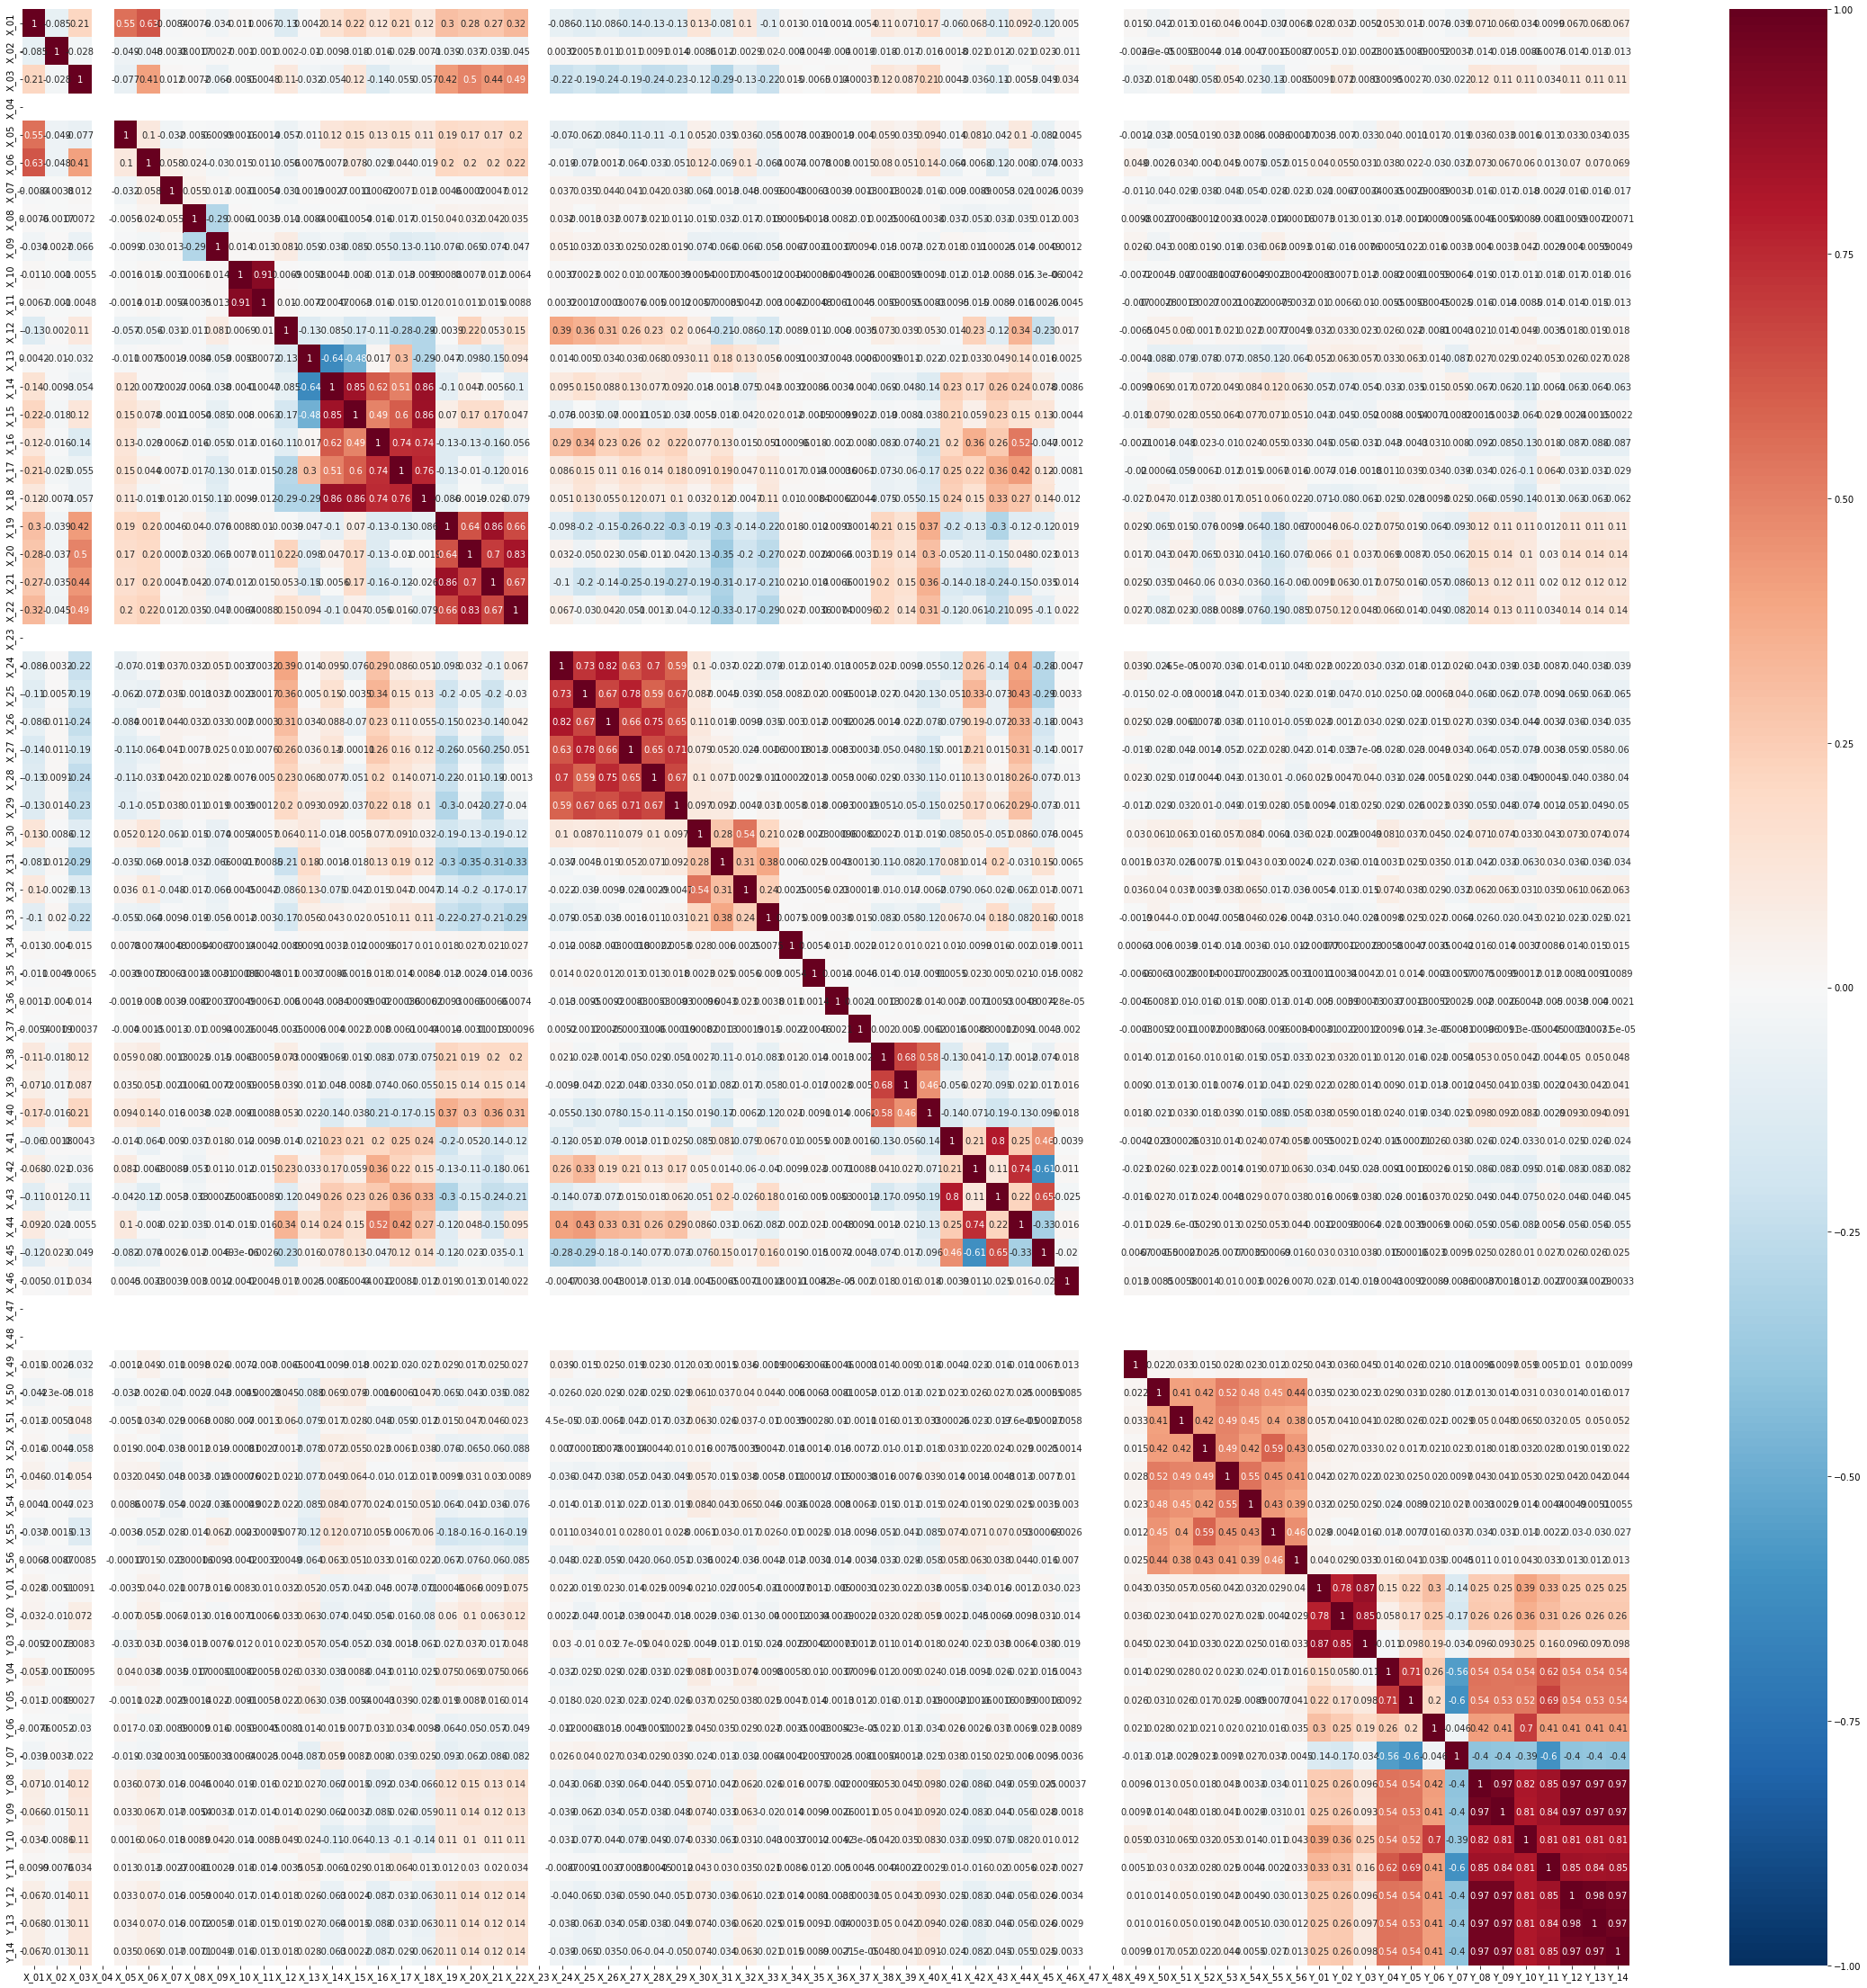

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
sns.heatmap(train.iloc[:,1:].corr(),
            annot=True,
            cmap='RdBu_r',
            vmin=-1)
plt.show()

In [8]:
group_dict = {
"Group_1" : ["X_01", "X_02", "X_05", "X_06"], #PCB 체결 시 단계별 누름량 
"Group_2" : ["X_03", "X_10", "X_11"], #방열 재료 무게
"Group_3" : ["X_04", "X_23", "X_47", "X_48"], #검사 통과 여부
"Group_4" : ["X_07", "X_08", "X_09"], #방열 재료 면적
"Group_5" : ["X_12"], #커넥터 위치 기준 좌표
"Group_6" : ["X_13"], #각 안테나 패드 위치(높이) 차이
"Group_7" : ["X_14", "X_15", "X_16", "X_17", "X_18"], #n번 안테나 패드 위치(높이)
"Group_8" : ["X_19", "X_20", "X_21", "X_22"], #n번 스크류 삽입 깊이
"Group_9" : ["X_24", "X_25", "X_26", "X_27", "X_28", "X_29"], #커넥터 n번 핀 치수
"Group_10" : ["X_30", "X_31", "X_32", "X_33"], #스크류 삽입 깊이 n
"Group_11" : ["X_34", "X_35", "X_36", "X_37"],#스크류 체결 시 분당 회전수 n
"Group_12" : ["X_38", "X_39", "X_40"], #하우징 PCB 안착부 n 치수
"Group_13" : ["X_41", "X_42", "X_43", "X_44"], #레이돔 치수(안테나 n번 부위)
"Group_14" : ["X_45"], #안테나 부분 레이돔 기울기 
"Group_15" : ["X_46"], #실란트 본드 소요량
"Group_16" : ["X_49"], #Cal 투입 전 대기 시간
"Group_17" : ["X_50", "X_51", "X_52", "X_53", "X_54", "X_55", "X_56"], #RF 부분 SMT 납 량
}


#유효성 검사

In [ ]:
validation = []

for i in train_x.index : 
  idx = 0
  val = 0
  for j in train_y.columns:
    if bool(spec.iloc[idx]['최소'] > train_y[j][i]) or bool(spec.iloc[idx]['최대'] < train_y[j][i]):
      val += 1 #유효하지 않음
    else:
      pass #유효함
    idx+=1
  validation.append(val)

In [ ]:
for i in train_x.index :
  if validation[i] > 0:
    train_x.loc[i, 'validation_test'] = 0 #유효하지않음 
  else:
    train_x.loc[i, 'validation_test'] = 1 #유효한 데이터

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
val_train_x = train_x[train_x['validation_test']==1]
nonval_train_x = train_x[train_x['validation_test']==0]

In [64]:
val_train_x

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,validation_test
1,69.524,103.321,65.17,1,101.944,72.943,28.73,61.23,233.61,0.0,...,1,10423.43,133.736691,135.979817,149.924692,123.630583,127.893337,143.322659,124.877308,1.0
2,72.583,103.320,64.07,1,103.153,72.943,28.81,105.77,272.20,0.0,...,1,10948.53,132.805112,131.055355,146.814592,128.939070,127.012195,140.395688,122.238232,1.0
3,71.563,103.320,67.57,1,101.971,77.022,28.92,115.21,255.36,0.0,...,1,15007.03,134.138760,133.239422,139.720132,132.260824,130.723186,147.624829,134.875225,1.0
4,69.524,103.320,63.57,1,101.981,70.904,29.68,103.38,241.46,0.0,...,1,11051.03,142.728970,136.620022,134.853555,134.760252,125.647793,139.331105,123.272762,1.0
5,69.524,103.320,62.77,1,101.899,69.884,27.90,64.97,241.85,0.0,...,1,9514.23,137.649365,124.373890,145.751970,121.860937,127.081180,139.840405,123.946308,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39601,64.425,103.320,63.87,1,102.037,68.864,30.40,99.99,199.55,0.0,...,1,60707.83,128.922673,128.715023,137.359163,125.521040,130.121288,138.584111,121.000820,1.0
39602,66.465,103.320,62.27,1,103.150,66.825,30.20,77.83,298.05,0.0,...,1,60630.73,129.965741,130.807148,133.481737,125.273130,121.780933,133.780110,129.029812,1.0
39603,66.465,103.321,62.77,1,102.021,66.825,29.21,102.25,270.67,0.0,...,1,60763.43,127.633885,120.158764,142.667802,122.465490,122.987209,143.090741,122.811413,1.0
39604,68.504,103.320,64.67,1,103.144,68.864,29.96,102.61,198.07,0.0,...,1,8813.33,132.501286,136.893025,134.419328,129.115431,130.920147,140.489232,119.166699,1.0


In [65]:
val_train_x.to_csv('./val_train_x.csv',columns=val_train_x.columns)

In [66]:
nonval_train_x.to_csv('./nonval_train_x.csv',columns=nonval_train_x.columns)

#Histogram(X)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffacfd8eb90>,
      dtype=object)

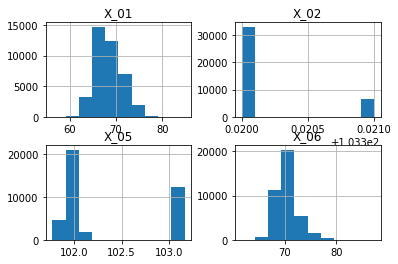

In [ ]:
#PCB 체결 시 단계별 누름량 
train_x[group_dict['Group_1']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffacf317f90>,
      dtype=object)

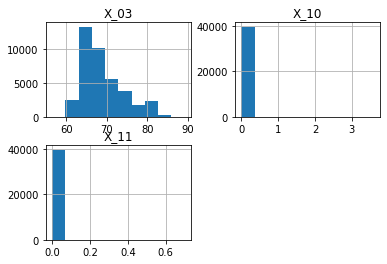

In [ ]:
#방열 재료 무게
train_x[group_dict['Group_2']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffaceef4f90>,
      dtype=object)

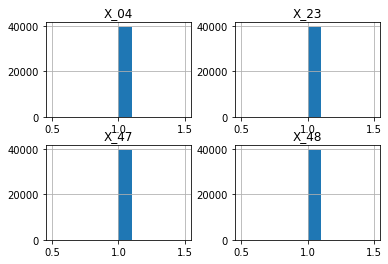

In [ ]:
#검사 통과 여부
train_x[group_dict['Group_3']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fface9b0090>,
      dtype=object)

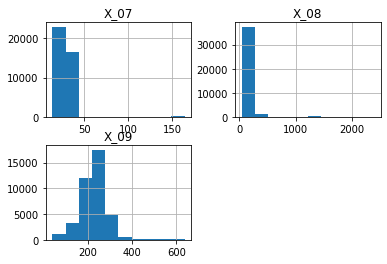

In [ ]:
#방열 재료 면적
train_x[group_dict['Group_4']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffacef70790>]],
      dtype=object)

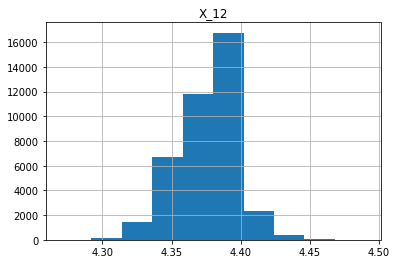

In [ ]:
#커넥터 위치 기준 좌표
train_x[group_dict['Group_5']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffacfa8ba10>]],
      dtype=object)

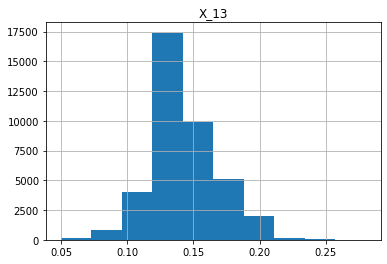

In [ ]:
#각 안테나 패드 위치(높이) 차이
train_x[group_dict['Group_6']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffacdb5d590>,
      dtype=object)

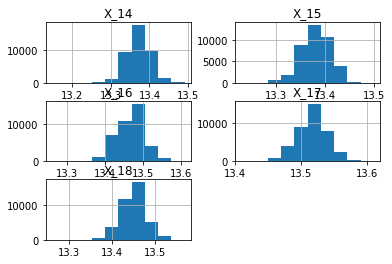

In [ ]:
#n번 안테나 패드 위치(높이)
train_x[group_dict['Group_7']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffaceb06610>,
      dtype=object)

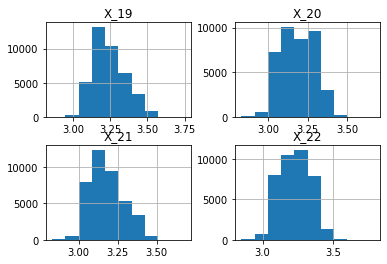

In [ ]:
#n번 스크류 삽입 깊이
train_x[group_dict['Group_8']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffacef7b990>,
      dtype=object)

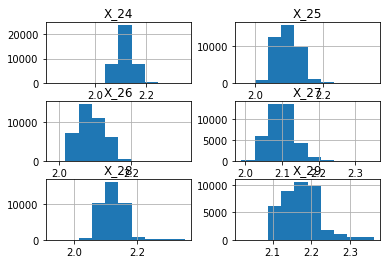

In [ ]:
#커넥터 n번 핀 치수
train_x[group_dict['Group_9']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffacafd7b90>,
      dtype=object)

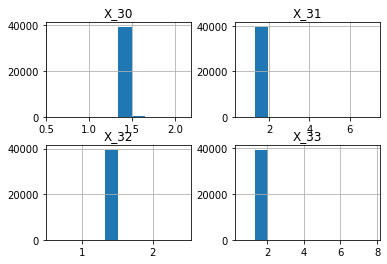

In [ ]:
#스크류 삽입 깊이 n
train_x[group_dict['Group_10']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffacf087e90>,
      dtype=object)

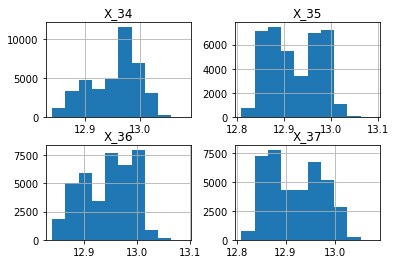

In [ ]:
#스크류 체결 시 분당 회전수 n
train_x[group_dict['Group_11']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffac6154590>,
      dtype=object)

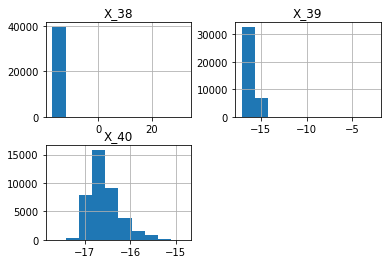

In [ ]:
#하우징 PCB 안착부 n 치수
train_x[group_dict['Group_12']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffacf3f8a90>,
      dtype=object)

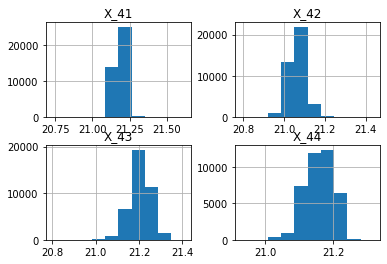

In [ ]:
#레이돔 치수(안테나 n번 부위)
train_x[group_dict['Group_13']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffacfc2f7d0>]],
      dtype=object)

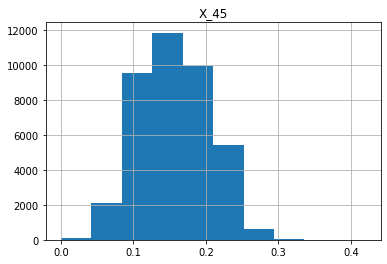

In [ ]:
#안테나 부분 레이돔 기울기 
train_x[group_dict['Group_14']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffacf8eb1d0>]],
      dtype=object)

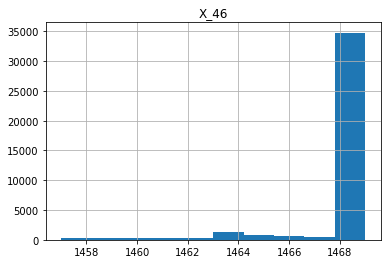

In [ ]:
#실란트 본드 소요량
train_x[group_dict['Group_15']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffacf7c6190>]],
      dtype=object)

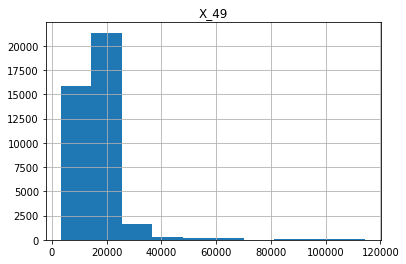

In [ ]:
#Cal 투입 전 대기 시간
train_x[group_dict['Group_16']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffacfb77750>,
      dtype=object)

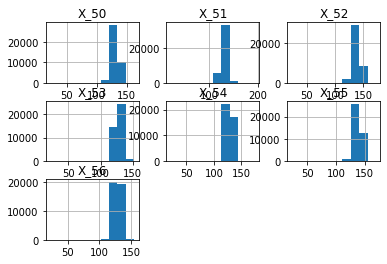

In [ ]:
#RF 부분 SMT 납 량
train_x[group_dict['Group_17']].hist()

#Histogram(y)

In [ ]:
group_y = {
    'Group_1' : ['Y_01','Y_05','Y_07','Y_11'], #안테나 Gain 평균
    'Group_2' : ['Y_02','Y_03'], #안테나 n Gain 편차
    'Group_3' : ['Y_04'], #평균 신호대 잡음비
    'Group_4' : ['Y_06','Y_08','Y_09','Y_10','Y_12','Y_13','Y_14'], #신호대 잡음비 (각도n)
}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffacfef3390>,
      dtype=object)

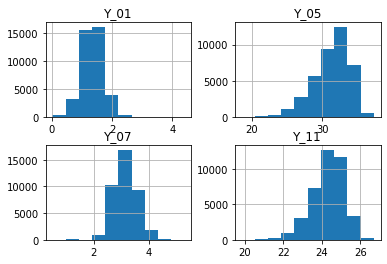

In [ ]:
#안테나 Gain 평균
train_y[group_y['Group_1']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffacdbec310>,
      dtype=object)

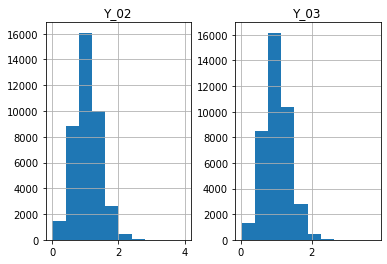

In [ ]:
#안테나 n Gain 편차
train_y[group_y['Group_2']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffacc6a6850>]],
      dtype=object)

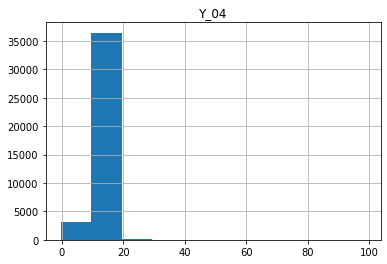

In [ ]:
#평균 신호대 잡음비
train_y[group_y['Group_3']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffacc630390>,
      dtype=object)

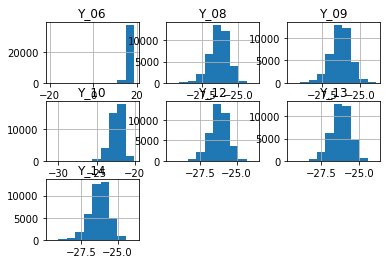

In [ ]:
#신호대 잡음비 (각도n)
train_y[group_y['Group_4']].hist()

#hist val, and nonval

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa16d57e6d0>]],
      dtype=object)

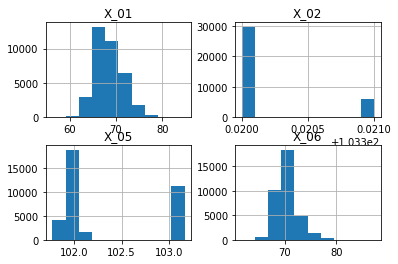

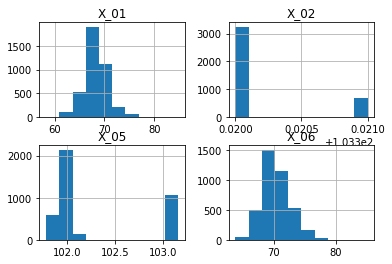

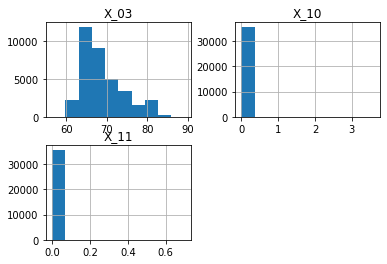

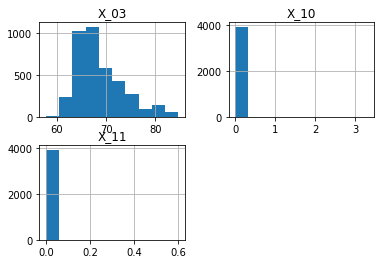

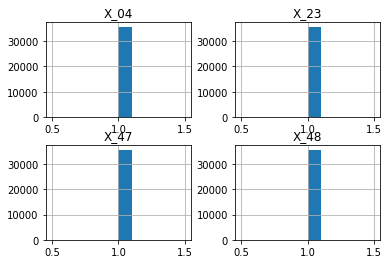

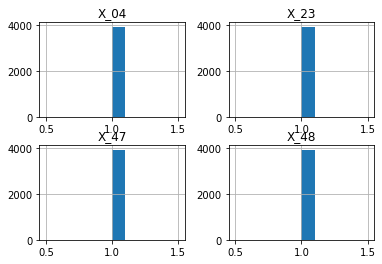

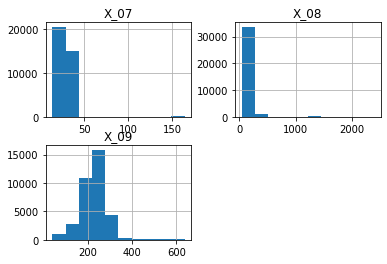

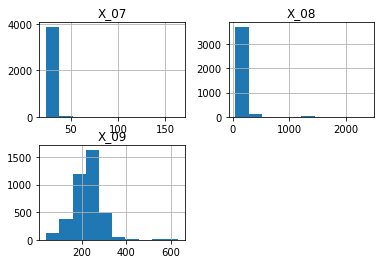

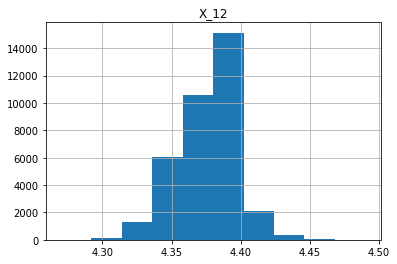

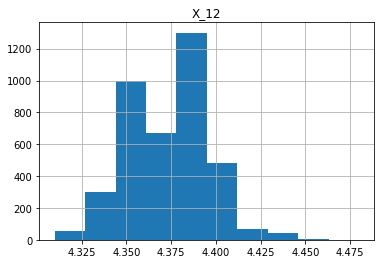

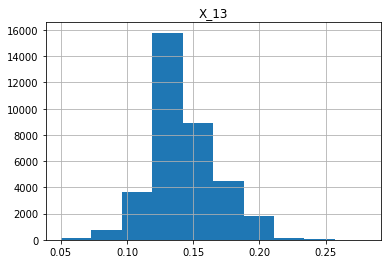

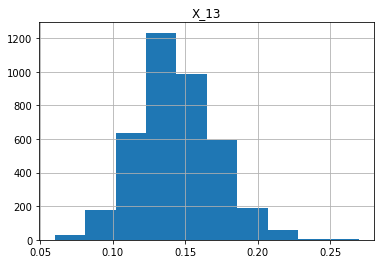

In [ ]:
#PCB 체결 시 단계별 누름량 
val_train_x[group_dict['Group_1']].hist()
nonval_train_x[group_dict['Group_1']].hist()
#방열 재료 무게
val_train_x[group_dict['Group_2']].hist()
nonval_train_x[group_dict['Group_2']].hist()
#검사 통과 여부
val_train_x[group_dict['Group_3']].hist()
nonval_train_x[group_dict['Group_3']].hist()
#방열 재료 면적
val_train_x[group_dict['Group_4']].hist()
nonval_train_x[group_dict['Group_4']].hist()
#커넥터 위치 기준 좌표
val_train_x[group_dict['Group_5']].hist()
nonval_train_x[group_dict['Group_5']].hist()
#각 안테나 패드 위치(높이) 차이
val_train_x[group_dict['Group_6']].hist()
nonval_train_x[group_dict['Group_6']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa16afd3ad0>,
      dtype=object)

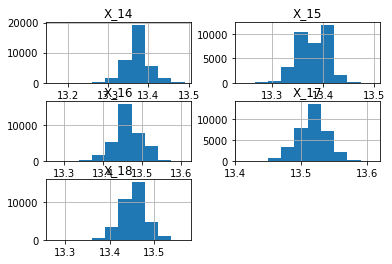

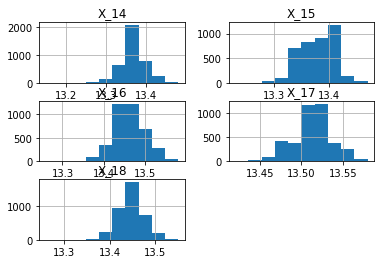

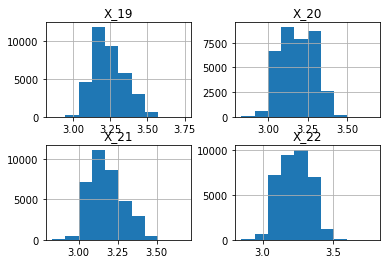

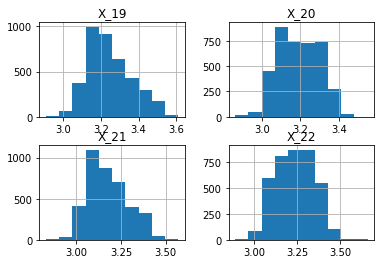

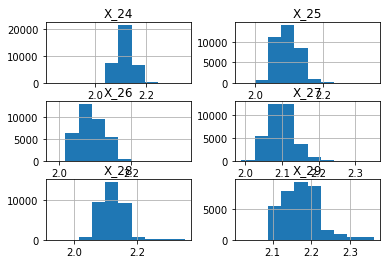

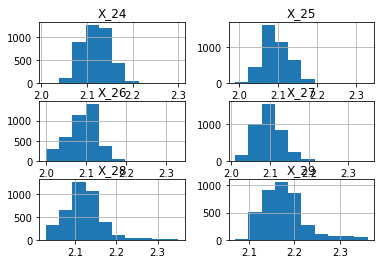

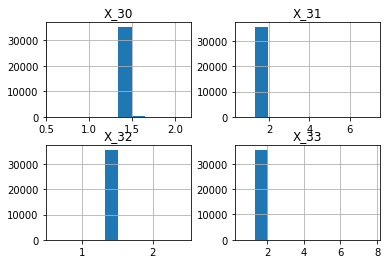

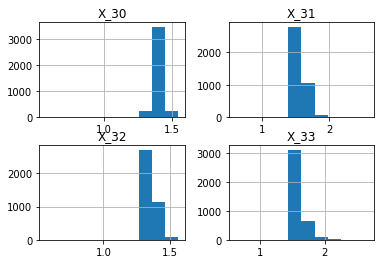

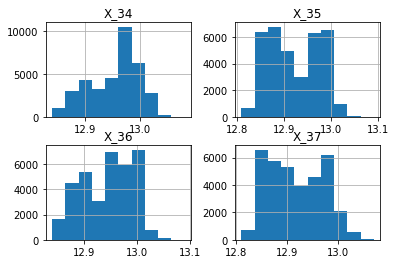

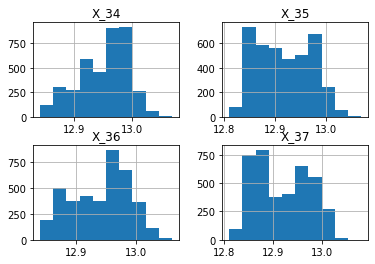

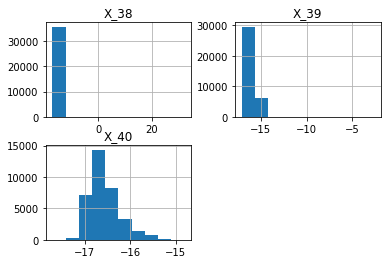

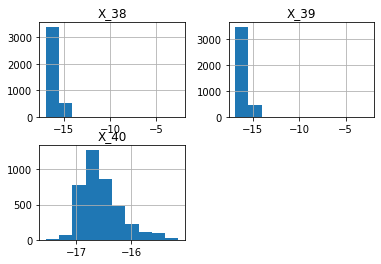

In [ ]:
#n번 안테나 패드 위치(높이)
val_train_x[group_dict['Group_7']].hist()
nonval_train_x[group_dict['Group_7']].hist()
#n번 스크류 삽입 깊이
val_train_x[group_dict['Group_8']].hist()
nonval_train_x[group_dict['Group_8']].hist()
#커넥터 n번 핀 치수
val_train_x[group_dict['Group_9']].hist()
nonval_train_x[group_dict['Group_9']].hist()
#스크류 삽입 깊이 n
val_train_x[group_dict['Group_10']].hist()
nonval_train_x[group_dict['Group_10']].hist()
#스크류 체결 시 분당 회전수 n
val_train_x[group_dict['Group_11']].hist()
nonval_train_x[group_dict['Group_11']].hist()
#하우징 PCB 안착부 n 치수
val_train_x[group_dict['Group_12']].hist()
nonval_train_x[group_dict['Group_12']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa16d2c8d90>,
      dtype=object)

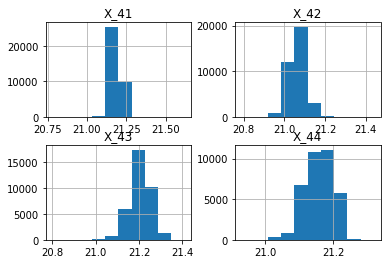

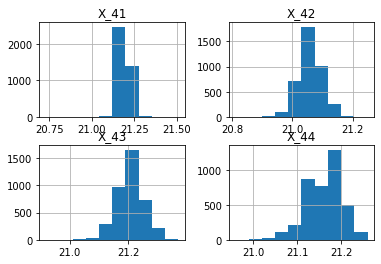

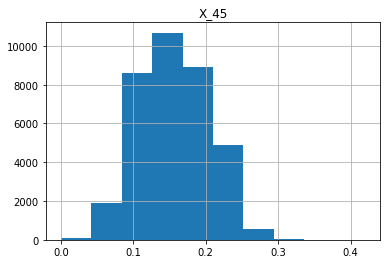

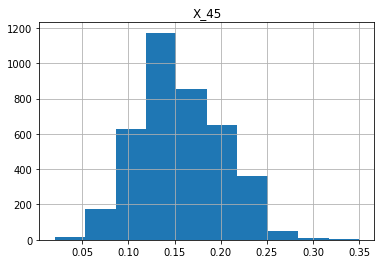

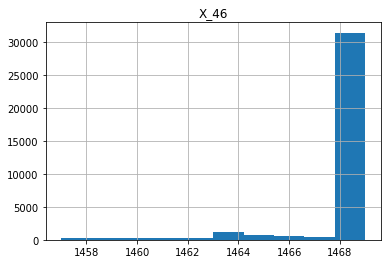

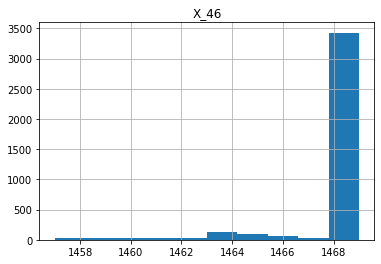

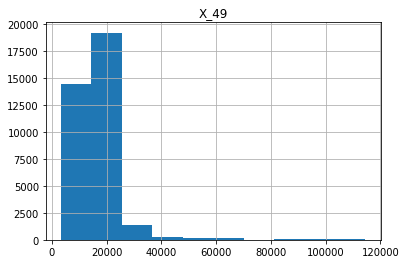

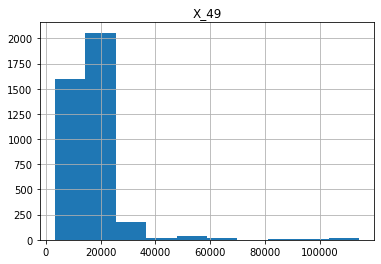

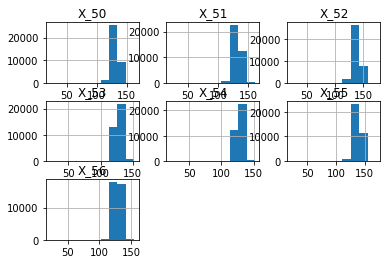

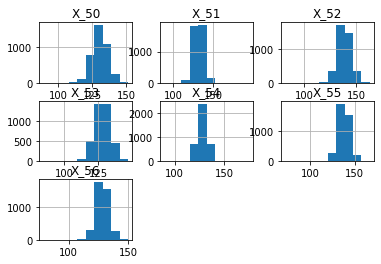

In [ ]:
#레이돔 치수(안테나 n번 부위)
val_train_x[group_dict['Group_13']].hist()
nonval_train_x[group_dict['Group_13']].hist()
#안테나 부분 레이돔 기울기 
val_train_x[group_dict['Group_14']].hist()
nonval_train_x[group_dict['Group_14']].hist()
#실란트 본드 소요량 ​
val_train_x[group_dict['Group_15']].hist()
nonval_train_x[group_dict['Group_15']].hist()
#Cal 투입 전 대기 시간
val_train_x[group_dict['Group_16']].hist()
nonval_train_x[group_dict['Group_16']].hist()
#RF 부분 SMT 납 량
val_train_x[group_dict['Group_17']].hist()
nonval_train_x[group_dict['Group_17']].hist()


#Eliminate Outlier 

In [31]:
def remove_outlier(data,column):
  q1 = np.percentile(data[column].values, 25)
  q3 = np.percentile(data[column].values, 75)

  iqr = q3 - q1
  iqr = iqr*1.5
  lowest = q1 - iqr
  highest = q3 + iqr
  outlier_index = data[column][(data[column]<lowest) | (data[column] > highest)].index
  print(len(outlier_index))
  data.drop(outlier_index, axis=0, inplace=True)
  print(data.shape)
  return data
#사용하지 않음

#Skewed data processing

In [94]:
import seaborn as sns
col = []
# skewness 확인
x = pd.DataFrame()
for i in x.columns: 
  if x[i].skew() > 0.5 or x[i].skew() < -0.5:
    print(i,x[i].skew())
    col.append(i)

1 1.7858429871649075
2 0.978427075450451
3 0.7919265141250358
5 17.141606310516206
6 6.554845614398595
7 0.5338614177029749
8 35.056516005532046
9 39.82855307305083
19 0.5250805505518185
22 0.5328523494744968
23 0.6472447889828165
24 1.2064594014420484
25 1.3953818862701926
26 1.1598070263373672
27 -2.395339372543793
28 14.00315296961814
29 -2.0135492977825087
30 10.88167660900742
35 14.735774295975025
36 14.21205049125919
37 1.0663292919307115
43 -0.7079469609302449
44 -0.6399881172738657
45 -0.7862962457675944
46 -0.8109491750784205
47 -1.38165125978218
48 -0.9666350100367576
49 -1.658077328887251


In [86]:
for i in train_x.columns: 
  if train_x[i].skew() > 0.5 or train_x[i].skew() < -0.5:
    print(i,train_x[i].skew())

X_02 1.7923818524052608
X_03 0.8384935271149458
X_05 0.7924891150859754
X_07 10.701762083728244
X_08 2.2963013271409536
X_09 -2.360258264623186
X_10 35.27102632493629
X_11 39.23675929875262
X_21 0.5092153187997611
X_25 0.512735218833818
X_26 0.6148525341236576
X_27 1.1566967820337533
X_28 1.3171350471359813
X_29 1.1410428528119254
X_30 -3.5141410710772902
X_31 8.37303503935347
X_32 -4.469175680722798
X_33 5.818793496546703
X_50 -5.430822758755468
X_51 -4.483325559896735
X_52 -4.636226876523768
X_53 -5.858246265168488
X_54 -7.799266995858635
X_55 -5.501436006582332
X_56 -8.55294810365734


In [83]:
col = []
# skewness 확인
for i in train_x.columns: 
  if test_x[i].skew() > 0.5 or test_x[i].skew() < -0.5:
    print(i,test_x[i].skew())
    col.append(i)
for i in col: 
  if i == 'X_38' or 'X_39' or 'X_40':
    test_x[i] = np.log(test_x[i]+18)
  test_x[i] = np.log(test_x[i])

X_02 1.8175996895158668
X_03 0.9842460841451094
X_05 0.7940509011710083
X_07 15.785316742710659
X_08 6.745645325675568
X_10 34.70879783419749
X_11 37.70231331685479
X_21 0.5243586910886329
X_26 0.5863151340424845
X_27 1.2160925757533716
X_28 1.2838279832582085
X_29 1.1795310667257928
X_30 -3.4663316480474315
X_31 15.822441708890878
X_32 -4.670144176769837
X_33 19.1758018043431
X_38 13.144112068828035
X_39 14.89325633224339
X_40 1.1032361439331269
X_46 -3.303137116477631
X_49 6.204261419425068
X_50 -2.336408134934971
X_51 -2.213829878670679
X_52 -2.149979036608575
X_53 -2.588024178626059
X_54 -3.3298102002278607
X_55 -2.2256348319549484
X_56 -3.5922638351332035


#Feature Selection

In [173]:
group_dict = {
"Group_1" : ["X_01", "X_02", "X_05", "X_06"], #PCB 체결 시 단계별 누름량 
"Group_2" : ["X_03", "X_10", "X_11"], #방열 재료 무게
"Group_3" : ["X_04", "X_23", "X_47", "X_48"], #검사 통과 여부
"Group_4" : ["X_07", "X_08", "X_09"], #방열 재료 면적
"Group_5" : ["X_12"], #커넥터 위치 기준 좌표
"Group_6" : ["X_13"], #각 안테나 패드 위치(높이) 차이
"Group_7" : ["X_14", "X_15", "X_16", "X_17", "X_18"], #n번 안테나 패드 위치(높이)
"Group_8" : ["X_19", "X_20", "X_21", "X_22"], #n번 스크류 삽입 깊이
"Group_9" : ["X_24", "X_25", "X_26", "X_27", "X_28", "X_29"], #커넥터 n번 핀 치수
"Group_10" : ["X_30", "X_31", "X_32", "X_33"], #스크류 삽입 깊이 n
"Group_11" : ["X_34", "X_35", "X_36", "X_37"],#스크류 체결 시 분당 회전수 n
"Group_12" : ["X_38", "X_39", "X_40"], #하우징 PCB 안착부 n 치수
"Group_13" : ["X_41", "X_42", "X_43", "X_44"], #레이돔 치수(안테나 n번 부위)
"Group_14" : ["X_45"], #안테나 부분 레이돔 기울기 
"Group_15" : ["X_46"], #실란트 본드 소요량
"Group_16" : ["X_49"], #Cal 투입 전 대기 시간
"Group_17" : ["X_50", "X_51", "X_52", "X_53", "X_54", "X_55", "X_56"], #RF 부분 SMT 납 량
}


In [174]:
#검사 통과 여부 컬럼 삭제
train_x = train_x.drop(columns=group_dict['Group_3'])
test_x = test_x.drop(columns=group_dict['Group_3'])
#
train_x = train_x.drop(columns=group_dict['Group_15'])
test_x = test_x.drop(columns=group_dict['Group_15'])
train_x = train_x.drop(columns=group_dict['Group_16'])
test_x = test_x.drop(columns=group_dict['Group_16'])

#Regression Model

In [175]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2)

In [178]:
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
X_train = minmax_scaler.fit_transform(X_train)
X_test = minmax_scaler.transform(X_test)
test_x = minmax_scaler.transform(test_x)

In [183]:
import xgboost
LR = MultiOutputRegressor(xgboost.XGBRegressor()).fit(X_train,y_train)
print('Done.')

[07:32:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:32:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:33:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [205]:
xg =xgboost.XGBRegressor()

In [204]:
from sklearn.ensemble import RandomForestRegressor
rf =RandomForestRegressor()

Done.


In [203]:
import lightgbm 
lgbm = lightgbm.LGBMRegressor()

Done.


In [206]:
from sklearn.ensemble import VotingRegressor
eclf = VotingRegressor(estimators=[('xg', xg), ('rf', rf), ('lgbm', lgbm)])
eclf = MultiOutputRegressor(eclf).fit(X_train,y_train)

[07:52:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:54:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:56:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:57:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:59:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:02:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:04:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:06:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [207]:
from sklearn import metrics
#normalized rmse 
def lg_nrmse(gt, preds):
    # 각 Y Feature별 NRMSE 총합
    # Y_01 ~ Y_08 까지 20% 가중치 부여
    all_nrmse = []
    for idx in range(0,14): # ignore 'ID'
        rmse = metrics.mean_squared_error(gt[:,idx], preds[:,idx], squared=False)
        nrmse = rmse/np.mean(np.abs(gt[:,idx]))
        all_nrmse.append(nrmse)
    score = 1.2 * np.sum(all_nrmse[:8]) + 1.0 * np.sum(all_nrmse[8:14])
    return score

In [208]:
y_pred = eclf.predict(X_test)
print('score : ',lg_nrmse(np.array(y_test),y_pred))

score :  1.9464363488781535


#Inference

In [209]:
preds = eclf.predict(test_x)
print(preds)

[[  1.43268428   1.19792329   1.07768483 ... -26.07709036 -26.07731197
  -26.04938675]
 [  1.46034721   1.18738243   1.14172763 ... -26.09279953 -26.04112708
  -26.02939935]
 [  1.46624812   1.17288549   1.10598987 ... -26.02963188 -26.01973381
  -26.02140383]
 ...
 [  1.21110908   0.87527265   0.88888294 ... -26.48946734 -26.49097292
  -26.50254744]
 [  1.2091412    0.85571883   0.93165024 ... -26.40070333 -26.45982876
  -26.45393051]
 [  1.27568984   0.9484013    0.93547432 ... -26.45718568 -26.44382521
  -26.44069487]]


In [153]:
preds.shape

(39608, 14)

#Submit

In [210]:
for idx, col in enumerate(submission.columns):
    if col=='ID':
        continue
    submission[col] = preds[:,idx-1]
print('Done.')

Done.


In [211]:
submission.to_csv('./submit_eclf.csv', index=False)

In [ ]:
#1.97512